<a href="https://colab.research.google.com/github/romeroc223/SySistemas2025/blob/main/Ejercicio_1_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧭 Modulación por Amplitud con Detección Coherente (AM Coherente)

## 🎯 ¿En qué consiste?

La **modulación por amplitud (AM)** es una técnica en la cual la **amplitud** de una **portadora senoidal** varía en proporción con la **amplitud instantánea de una señal mensaje** (también llamada señal moduladora).

La expresión general para una señal AM es:

\[
s(t) = A_c [1 + k_a \, m(t)] \cos(2\pi f_c t)
\]

donde:
- \( A_c \): amplitud de la portadora  
- \( k_a \): índice de modulación (sensibilidad)  
- \( m(t) \): señal mensaje  
- \( f_c \): frecuencia de la portadora  

El **índice de modulación** \( \mu = k_a \cdot m_{max} \) indica qué tanto varía la amplitud de la portadora.  
- Si \( \mu < 1 \): modulación submodulada (válida)  
- Si \( \mu = 1 \): modulación al 100%  
- Si \( \mu > 1 \): sobremodulación (se pierde información)

---

## 🔍 Detección Coherente

La **detección coherente** (o **demodulación síncrona**) consiste en **multiplicar** la señal AM recibida por una **réplica sincronizada** de la portadora original y luego **filtrar** el resultado con un **pasa bajos** para recuperar \( m(t) \).

\[
\text{Salida: } y(t) = [A_c (1 + k_a m(t)) \cos(2\pi f_c t)] \cdot \cos(2\pi f_c t)
\]

Usando la identidad trigonométrica:
\[
\cos^2(2\pi f_c t) = \frac{1 + \cos(4\pi f_c t)}{2}
\]

obtenemos:
\[
y(t) = \frac{A_c}{2}(1 + k_a m(t)) + \frac{A_c}{2}(1 + k_a m(t)) \cos(4\pi f_c t)
\]

Después del **filtro pasa bajos**, se elimina el término de alta frecuencia (\( 2f_c \)) y queda:
\[
y_{LPF}(t) = \frac{A_c}{2} (1 + k_a m(t))
\]

Por tanto, la información \( m(t) \) se recupera proporcionalmente.

---

## ⚙️ Aplicaciones

- **Radiodifusión AM** (bandas de 530 kHz – 1700 kHz)  
- **Telemetría y comunicaciones analógicas simples**  
- **Transmisión de audio en sistemas antiguos**  
- **Comunicaciones ópticas moduladas en intensidad**

---

## 🧪 Ejemplo en Python: Modulación AM Coherente

Este ejemplo permite comparar la modulación para:
- una **señal tipo pulso rectangular**, y  
- una **señal tipo coseno**.

El usuario puede ajustar el **índice de modulación μ**.

---


Ingrese el índice de modulación (0 < μ ≤ 1): 0.5


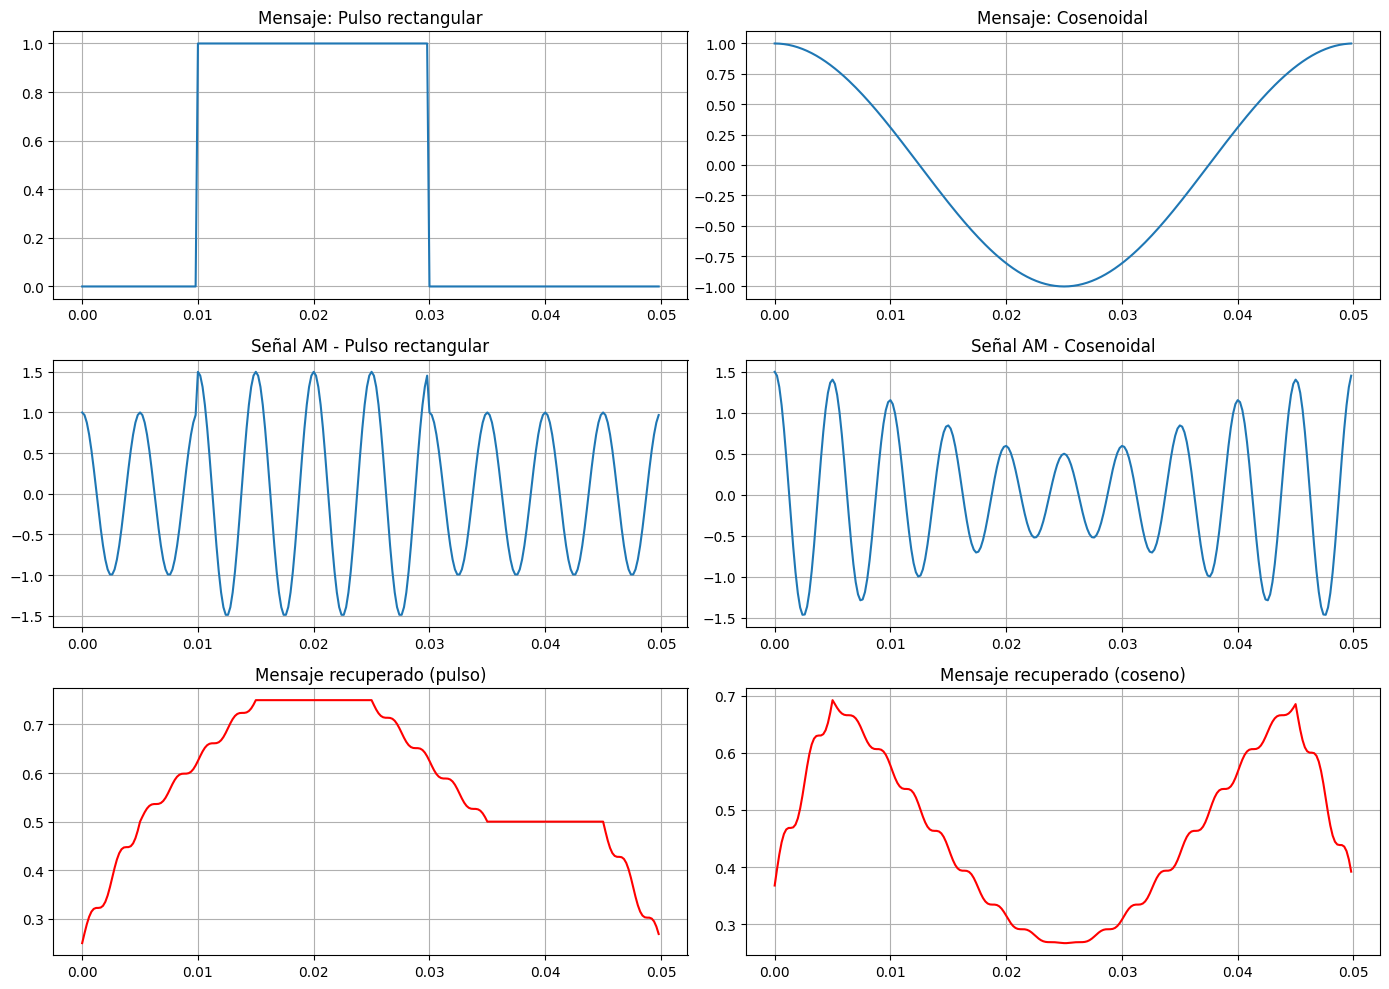

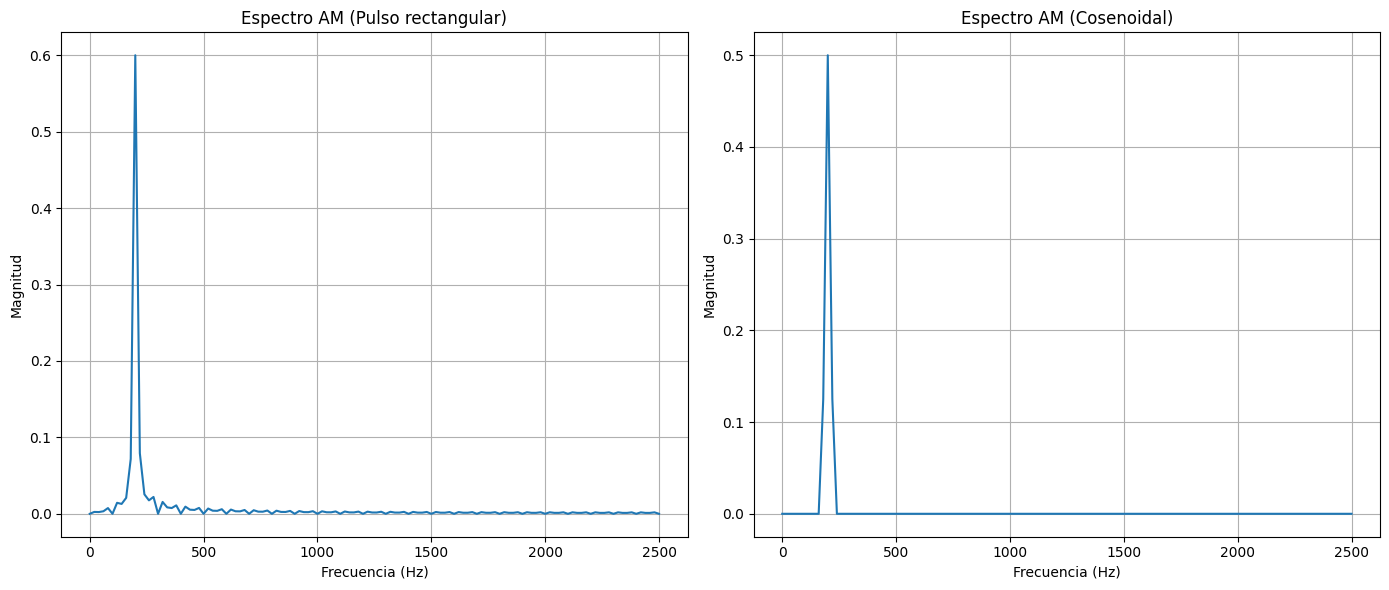

In [1]:
# 📘 Ejemplo práctico de Modulación AM con detección coherente
# Autor: Juan David Redín Castañeda
# Materia: Comunicaciones Analógicas

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
fs = 5000            # Frecuencia de muestreo (Hz)
t = np.arange(0, 0.05, 1/fs)   # Vector de tiempo
fc = 200              # Frecuencia portadora (Hz)

# --- Parámetro de usuario ---
mu = float(input("Ingrese el índice de modulación (0 < μ ≤ 1): "))

# --- Señales mensaje ---
# 1) Pulso rectangular
m1 = np.where((t >= 0.01) & (t <= 0.03), 1, 0)

# 2) Señal cosenoidal
fm = 20
m2 = np.cos(2 * np.pi * fm * t)

# --- Señales AM ---
Ac = 1
s1 = Ac * (1 + mu * m1) * np.cos(2 * np.pi * fc * t)
s2 = Ac * (1 + mu * m2) * np.cos(2 * np.pi * fc * t)

# --- Detección coherente ---
r1 = s1 * np.cos(2 * np.pi * fc * t)
r2 = s2 * np.cos(2 * np.pi * fc * t)

# --- Filtro pasa bajos sencillo (promedio móvil) ---
def lpf(signal, N=50):
    return np.convolve(signal, np.ones(N)/N, mode='same')

m1_rec = lpf(r1)
m2_rec = lpf(r2)

# --- Función para graficar espectros ---
def plot_fft(sig, fs, title):
    N = len(sig)
    freqs = np.fft.rfftfreq(N, 1/fs)
    spectrum = np.abs(np.fft.rfft(sig)) / N
    plt.plot(freqs, spectrum)
    plt.title(title)
    plt.xlabel("Frecuencia (Hz)")
    plt.ylabel("Magnitud")
    plt.grid(True)

# --- Gráficos en el tiempo ---
plt.figure(figsize=(14,10))
plt.subplot(3,2,1)
plt.plot(t, m1); plt.title("Mensaje: Pulso rectangular"); plt.grid()
plt.subplot(3,2,2)
plt.plot(t, m2); plt.title("Mensaje: Cosenoidal"); plt.grid()

plt.subplot(3,2,3)
plt.plot(t, s1); plt.title("Señal AM - Pulso rectangular"); plt.grid()
plt.subplot(3,2,4)
plt.plot(t, s2); plt.title("Señal AM - Cosenoidal"); plt.grid()

plt.subplot(3,2,5)
plt.plot(t, m1_rec, 'r'); plt.title("Mensaje recuperado (pulso)"); plt.grid()
plt.subplot(3,2,6)
plt.plot(t, m2_rec, 'r'); plt.title("Mensaje recuperado (coseno)"); plt.grid()
plt.tight_layout()
plt.show()

# --- Espectros en frecuencia ---
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plot_fft(s1, fs, "Espectro AM (Pulso rectangular)")
plt.subplot(1,2,2)
plot_fft(s2, fs, "Espectro AM (Cosenoidal)")
plt.tight_layout()
plt.show()
